# India COVID-19 Related Data

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np

!conda install -c anaconda beautifulsoup4 --y
from bs4 import BeautifulSoup
import requests

import json # library to handle JSON files
!pip install lxml
!pip install html5lib

import folium # map rendering library

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from pandas.io.json import json_normalize  # tranform JSON file into a pandas dataframe

# import k-means from clustering stage
from sklearn.cluster import KMeans

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - beautifulsoup4


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    beautifulsoup4-4.9.1       |           py36_0         168 KB  anaconda
    ca-certificates-2020.6.24  |                0         133 KB  anaconda
    certifi-2020.6.20          |           py36_0         160 KB  anaconda
    openssl-1.1.1g             |       h7b6447c_0         3.8 MB  anaconda
    soupsieve-2.0.1            |             py_0          33 KB  anaconda
    ------------------------------------------------------------
                                           Total:         4.3 MB

The following 

## DATA

#### Read and show data Covid-19 cases per district

In [2]:
df_cases = pd.read_csv("https://api.covid19india.org/csv/latest/state_wise.csv")
df_cases = df_cases.rename(columns={"State": "State or Union Territory"})
df_cases

,State or Union Territory,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes
0,Total,2395471,1695860,47138,651999,12/08/2020 23:15:35,474,TT,67066,57759,950,NaN
1,Maharashtra,548313,381843,18650,147513,12/08/2020 22:49:36,307,MH,12712,13408,344,307 cases are marked as non-covid deaths in MH...
2,Tamil Nadu,314520,256313,5278,52929,12/08/2020 18:52:40,0,TN,5871,5633,119,[July 22]: 444 backdated deceased entries adde...
3,Delhi,148504,133405,4153,10946,12/08/2020 16:08:37,0,DL,1113,1021,14,[July 14]: Value for the total tests conducted...
4,Karnataka,196494,112633,3511,80341,12/08/2020 20:04:38,9,KA,7883,7034,113,NaN
5,Andhra Pradesh,254146,161425,2296,90425,12/08/2020 18:36:44,0,AP,9597,6676,93,Total includes patients from other states and ...
6,Uttar Pradesh,136238,84661,2230,49347,12/08/2020 18:36:47,0,UP,4475,4072,54,NaN
7,Gujarat,74390,57493,2713,14184,12/08/2020 21:39:46,0,GJ,1152,977,18,NaN
8,West Bengal,104326,76120,2203,26003,12/08/2020 21:39:49,0,WB,2936,2725,54,NaN
9,Telangana,84544,61294,654,22596,12/08/2020 09:42:38,0,TG,1897,1920,9,[July 27]\nTelangana bulletin for the previous...


#### Read and show the top 5 data rows from Covid-19 cases per district.

In [3]:
df_cases.head()

,State or Union Territory,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes
0,Total,2395471,1695860,47138,651999,12/08/2020 23:15:35,474,TT,67066,57759,950,NaN
1,Maharashtra,548313,381843,18650,147513,12/08/2020 22:49:36,307,MH,12712,13408,344,307 cases are marked as non-covid deaths in MH...
2,Tamil Nadu,314520,256313,5278,52929,12/08/2020 18:52:40,0,TN,5871,5633,119,[July 22]: 444 backdated deceased entries adde...
3,Delhi,148504,133405,4153,10946,12/08/2020 16:08:37,0,DL,1113,1021,14,[July 14]: Value for the total tests conducted...
4,Karnataka,196494,112633,3511,80341,12/08/2020 20:04:38,9,KA,7883,7034,113,NaN


#### Read and show the bottom 5 data rows from Covid-19 cases per district

In [4]:
df_cases.tail()

,State or Union Territory,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes
33,Sikkim,930,550,1,379,12/08/2020 22:01:55,0,SK,17,16,0,NaN
34,Mizoram,648,330,0,318,12/08/2020 17:49:41,0,MZ,25,7,0,NaN
35,Andaman and Nicobar Islands,1900,829,21,1050,12/08/2020 21:51:45,0,AN,136,80,0,NaN
36,State Unassigned,0,0,0,0,19/07/2020 09:40:01,0,UN,0,0,0,MoHFW website reports that these are the 'case...
37,Lakshadweep,0,0,0,0,26/03/2020 07:19:29,0,LD,0,0,0,NaN


#### Read and show the total population data in India 2020.

In [5]:
source = requests.get("https://en.wikipedia.org/wiki/List_of_states_and_union_territories_of_India_by_population").text
soup = BeautifulSoup(source, 'html.parser')

table = soup.find("table", class_="wikitable sortable")
#print(table.tbody)
table_rows = table.tbody.find_all("tr")
#print(table_rows)
res = []
for tr in table_rows:
    td = tr.find_all("td")
    row = [tr.text for tr in td]
    #print(row)
    if row != []:
        res.append(row)
        
df_states = pd.DataFrame(res, columns = ["Rank", "State or Union Territory", "Population", "Population %", "R", 
                                  "Rural Population", "RR", "Urban Population", "RRR", "Area", "Density", "RRRR"])
df_states.head()            

,Rank,State or Union Territory,Population,Population %,R,Rural Population,RR,Urban Population,RRR,Area,Density,RRRR
0,1\n,Uttar Pradesh\n,"199,812,341\n",16.51%\n,20.2%\n,"155,317,278\n",77.73%\n,"44,495,063\n",22.27%\n,"240,928 km2 (93,023 sq mi)\n","828/km2 (2,140/sq mi)\n",912\n
1,2\n,Maharashtra\n,"112,374,333\n",9.28%\n,20.0%\n,"61,556,074\n",54.78%\n,"50,818,259\n",45.22%\n,"307,713 km2 (118,809 sq mi)\n",365/km2 (950/sq mi)\n,929\n
2,3\n,Bihar\n,"104,099,452\n",8.6%\n,25.4%\n,"92,341,436\n",88.71%\n,"11,758,016\n",11.29%\n,"94,163 km2 (36,357 sq mi)\n","1,102/km2 (2,850/sq mi)\n",918\n
3,4\n,West Bengal\n,"91,276,115\n",7.54%\n,13.8%\n,"62,183,113\n",68.13%\n,"29,093,002\n",31.87%\n,"88,752 km2 (34,267 sq mi)\n","1,029/km2 (2,670/sq mi)\n",953\n
4,5\n,Madhya Pradesh\n,"72,626,809\n",6%\n,16.3%\n,"52,557,404\n",72.37%\n,"20,069,405\n",27.63%\n,"308,245 km2 (119,014 sq mi)\n",236/km2 (610/sq mi)\n,931\n


In [6]:
df_states["Rank"] = df_states["Rank"].str.replace("\n","")
df_states["State or Union Territory"] = df_states["State or Union Territory"].str.replace("\n","")
df_states["Population"] = df_states["Population"].str.replace("\n","")
df_states["Population %"] = df_states["Population %"].str.replace("\n","")
df_states["R"] = df_states["R"].str.replace("\n","")
df_states["Rural Population"] = df_states["Rural Population"].str.replace("\n","")
df_states["RR"] = df_states["RR"].str.replace("\n","")
df_states["Urban Population"] = df_states["Urban Population"].str.replace("\n","")
df_states["RRR"] = df_states["RRR"].str.replace("\n","")
df_states["Area"] = df_states["Area"].str.replace("\n","")
df_states["Density"] = df_states["Density"].str.replace("\n","")
df_states["RRRR"] = df_states["RRRR"].str.replace("\n","")
df_states = df_states.reset_index()
df_states = df_states.drop('index', axis=1)
df_states = df_states.drop('R', axis=1)
df_states = df_states.drop('RR', axis=1)
df_states = df_states.drop('RRR', axis=1)
df_states = df_states.drop('RRRR', axis=1)
#df_states.to_csv('States.csv')
df_states.head()

,Rank,State or Union Territory,Population,Population %,Rural Population,Urban Population,Area,Density
0,1,Uttar Pradesh,"199,812,341",16.51%,"155,317,278","44,495,063","240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)"
1,2,Maharashtra,"112,374,333",9.28%,"61,556,074","50,818,259","307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi)
2,3,Bihar,"104,099,452",8.6%,"92,341,436","11,758,016","94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)"
3,4,West Bengal,"91,276,115",7.54%,"62,183,113","29,093,002","88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)"
4,5,Madhya Pradesh,"72,626,809",6%,"52,557,404","20,069,405","308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi)


In [7]:
#Total = df_states['Population'].max()
Total = df_states.loc[df_states['State or Union Territory'] == 'India']['Population'].values[0]
Total
print ("Total Polulation :", Total)

Total Polulation : 1,210,569,573


In [8]:
df = pd.read_json("https://api.steinhq.com/v1/storages/5e732accb88d3d04ae0815ae/StateWiseHealthCapacity")
df

,State,RuralHospitalsCount,RuralBeds,UrbanHospitals,UrbanBeds,TotalHospitalsCount,TotalBedsCount,LastUpdated,Source
0,Andhra Pradesh,193,6480,65,16658,258,23138,2017-01-01 0:00:00,https://pib.gov.in/PressReleasePage.aspx?PRID=...
1,Arunachal Pradesh,208,2136,10,268,218,2404,2017-12-31 0:00:00,https://pib.gov.in/PressReleasePage.aspx?PRID=...
2,Assam,1176,10944,50,6198,1226,17142,2017-12-31 0:00:00,https://pib.gov.in/PressReleasePage.aspx?PRID=...
3,Bihar,930,6083,103,5936,1033,12019,2016-12-31 0:00:00,https://pib.gov.in/PressReleasePage.aspx?PRID=...
4,Chhattisgarh,169,5070,45,4342,214,9412,2016-01-01 0:00:00,https://pib.gov.in/PressReleasePage.aspx?PRID=...
5,Goa,17,1405,25,1608,42,3013,2017-12-31 0:00:00,https://pib.gov.in/PressReleasePage.aspx?PRID=...
6,Gujarat,364,11715,122,20565,486,32280,2016-12-31 0:00:00,https://pib.gov.in/PressReleasePage.aspx?PRID=...
7,Haryana,609,6690,59,4550,668,11240,2016-12-31 0:00:00,https://pib.gov.in/PressReleasePage.aspx?PRID=...
8,Himachal Pradesh,705,5665,96,6734,801,12399,2017-12-31 0:00:00,https://pib.gov.in/PressReleasePage.aspx?PRID=...
9,Jammu & Kashmir,56,7234,76,4417,132,11651,2016-12-30 0:00:00,https://pib.gov.in/PressReleasePage.aspx?PRID=...


In [9]:
df_hospitals = pd.read_excel("medicallist.xlsx")
df_hospitals.head()

,Sr. No.,Name of Insurance Co.,State,City,Provider Name,Category Code,Address,Pin Code,Tel Area\nCode,Tel No.,Fax No.,"Not Servicing to\nInsurance Co., but",Provider\nNo.
0,1,PSU-United India Insurance Company,Andhra Pradesh,Anantapur,AASHA HOSPITAL(APOLLO HOSPITAL-ANANTAPUR),Hospital,"Door No 7/201,Court Road,Anantapur",515001.0,8554,274194/237818,245755,NaN,2463
1,2,PSU-United India Insurance Company,Andhra Pradesh,Anantapur,DR. Y.S.R. MEMORIAL HOSPITALS,Hospital,"# 12-2-878, 1# Cross,,,Sai Nagar,",515001.0,8554,232727 / 247365,NaN,NaN,10710
2,3,PSU-United India Insurance Company,Andhra Pradesh,Anantapur,SRI PRAKASH EYE HOSPITAL,Hospital,"# 12-3-216, Sai Nagar, Main Road,,5th Croos,,B...",515001.0,8554,221006,245906,NaN,75521
3,4,PSU-United India Insurance Company,Andhra Pradesh,Anantapur,VASAN EYE CARE HOSPITAL (ANANTAPUR),Hospital,"# 15/581, Street Raju Road,,Anantapur",515001.0,8554,222445 / 302100,302199,NaN,14095
4,5,PSU-United India Insurance Company,Andhra Pradesh,Bhimavaram,BHIMAVARAM HOSPITAL,Hospital,"J P Road,,West Godavari,,",534204.0,8816,221111 / 22 / 33,221100,NaN,3903


#### The top 5 data rows from Hospital data providing treatment Covid-19.

In [10]:
df_hospitals = df_hospitals[['Sr. No.','State','City','Provider Name','Category Code','Address','Pin Code']]
df_hospitals.head()

,Sr. No.,State,City,Provider Name,Category Code,Address,Pin Code
0,1,Andhra Pradesh,Anantapur,AASHA HOSPITAL(APOLLO HOSPITAL-ANANTAPUR),Hospital,"Door No 7/201,Court Road,Anantapur",515001.0
1,2,Andhra Pradesh,Anantapur,DR. Y.S.R. MEMORIAL HOSPITALS,Hospital,"# 12-2-878, 1# Cross,,,Sai Nagar,",515001.0
2,3,Andhra Pradesh,Anantapur,SRI PRAKASH EYE HOSPITAL,Hospital,"# 12-3-216, Sai Nagar, Main Road,,5th Croos,,B...",515001.0
3,4,Andhra Pradesh,Anantapur,VASAN EYE CARE HOSPITAL (ANANTAPUR),Hospital,"# 15/581, Street Raju Road,,Anantapur",515001.0
4,5,Andhra Pradesh,Bhimavaram,BHIMAVARAM HOSPITAL,Hospital,"J P Road,,West Godavari,,",534204.0


#### This sums up our data mining and data exploration section. 

##### In the following METHODOLOGY section, we will describe the process of how to do a ‘Visual’ approach to better understand our data using data science and data analytics tool kits.

## METHODOLOGY

In [11]:
df_cases.columns

Index(['State or Union Territory', 'Confirmed', 'Recovered', 'Deaths',
       'Active', 'Last_Updated_Time', 'Migrated_Other', 'State_code',
       'Delta_Confirmed', 'Delta_Recovered', 'Delta_Deaths', 'State_Notes'],
      dtype='object')

In [12]:
df_cases = df_cases[['State or Union Territory', 'Confirmed', 'Recovered', 'Deaths', 'Active']]
df_cases.head()

,State or Union Territory,Confirmed,Recovered,Deaths,Active
0,Total,2395471,1695860,47138,651999
1,Maharashtra,548313,381843,18650,147513
2,Tamil Nadu,314520,256313,5278,52929
3,Delhi,148504,133405,4153,10946
4,Karnataka,196494,112633,3511,80341


In [13]:
df_cases.tail()

,State or Union Territory,Confirmed,Recovered,Deaths,Active
33,Sikkim,930,550,1,379
34,Mizoram,648,330,0,318
35,Andaman and Nicobar Islands,1900,829,21,1050
36,State Unassigned,0,0,0,0
37,Lakshadweep,0,0,0,0


In [14]:
df_cases.describe()

,Confirmed,Recovered,Deaths,Active
count,3.800000e+01,3.800000e+01,38.000000,38.000000
mean,1.260774e+05,8.925579e+04,2480.947368,34315.736842
std,3.934387e+05,2.787107e+05,8086.451706,107275.945381
min,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,2.602000e+03,1.370250e+03,13.250000,1094.750000
50%,2.333500e+04,1.470450e+04,150.500000,7109.500000
75%,8.200550e+04,5.942425e+04,991.500000,19765.500000
max,2.395471e+06,1.695860e+06,47138.000000,651999.000000


#### Check if there are any missing or null values.

In [15]:
df_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   State or Union Territory  38 non-null     object
 1   Confirmed                 38 non-null     int64 
 2   Recovered                 38 non-null     int64 
 3   Deaths                    38 non-null     int64 
 4   Active                    38 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.6+ KB


In [16]:
df_cases.head()

,State or Union Territory,Confirmed,Recovered,Deaths,Active
0,Total,2395471,1695860,47138,651999
1,Maharashtra,548313,381843,18650,147513
2,Tamil Nadu,314520,256313,5278,52929
3,Delhi,148504,133405,4153,10946
4,Karnataka,196494,112633,3511,80341


In [17]:
Total_Active_Cases = df_cases.loc[df_cases['State or Union Territory'] == 'Total']['Active'].values[0]
Total_Active_Cases
print ("Total Polulation :", Total_Active_Cases)
Total_Confirmed_Cases = df_cases.loc[df_cases['State or Union Territory'] == 'Total']['Confirmed'].values[0]
Total_Confirmed_Cases
print ("Total Polulation :", Total_Confirmed_Cases)

Total Polulation : 651999
Total Polulation : 2395471


#### Get the latitude and longitude of States and Union Territories.

In [18]:
df_ll = pd.read_excel('States or Union Territories Location Points.xlsx')
df_ll

,State or Union Territory,Latitude,Longitude
0,Andaman And Nicobar,11.667026,92.735983
1,Andhra Pradesh,14.750429,78.570026
2,Arunachal Pradesh,27.100399,93.616601
3,Assam,26.749981,94.216667
4,Bihar,25.785414,87.479973
5,Chandigarh,30.719997,76.780006
6,Chhattisgarh,22.090420,82.159987
7,Dadra And Nagar Haveli,20.266578,73.016618
8,Delhi,28.669993,77.230004
9,Goa,15.491997,73.818001


In [19]:
center_lat = df_ll.mean().Latitude
center_long = df_ll.mean().Longitude

m = folium.Map(location=[center_lat, center_long], tiles="Stamen Terrain")

folium.FitBounds([(center_lat-5,center_long-5), (center_lat+5,center_long+5)]).add_to(m)

m

In [20]:
# Define the map object and then display using the specified latitude and longitude values
map_india = folium.Map(location=[30.742600, 76.758725], zoom_start=12)
map_india

In [21]:
df_population = pd.read_excel('State Population.xlsx')
df_population['Population'].astype(int)
df_population

,State or Union Territory,Population
0,Uttar Pradesh,199812341
1,Maharashtra,112374333
2,Bihar,104099452
3,West Bengal,91276115
4,Madhya Pradesh,72626809
5,Tamil Nadu,72147030
6,Rajasthan,68548437
7,Karnataka,61095297
8,Gujarat,60439692
9,Andhra Pradesh,49577103


#### The chart below show the population density in each state or union territory of India.

<AxesSubplot:xlabel='State or Union Territory'>

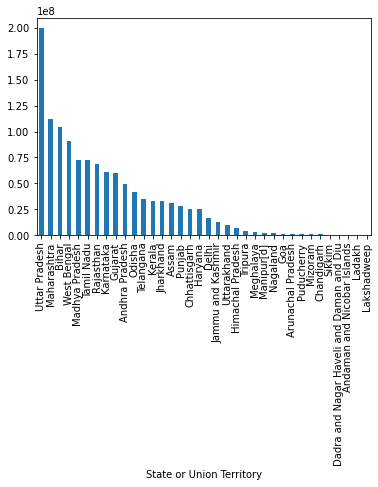

In [22]:
import matplotlib as plt

df_population.set_index('State or Union Territory')['Population'].plot.bar()

To better understand and estimate the territories or areas that are within the administrative government of India, we need to plot all the States or Union Territories that we have downloaded from site together with their latitude and longitude values. The following lines of Python code will execute the task using Folium API.

In [23]:
# Construct a map of all state or union territories neighborhood in India.
center_lat = df_ll.mean().Latitude
center_long = df_ll.mean().Longitude

m = folium.Map(location=[center_lat, center_long], tiles="Stamen Terrain",zoom_start=5)
folium.FitBounds([(center_lat-5,center_long-5), (center_lat+5,center_long+5)]).add_to(m)


for lat, lng, label in zip(df_ll['Latitude'], df_ll['Longitude'], df_ll['State or Union Territory']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        location=[lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(m)      
m

In [24]:
df_ll_a = pd.merge(df_ll, df_cases, how='inner', on='State or Union Territory')
df_ll_a = df_ll_a[['State or Union Territory', 'Latitude', 'Longitude', 'Active']]
df_ll_a

,State or Union Territory,Latitude,Longitude,Active
0,Andhra Pradesh,14.750429,78.570026,90425
1,Arunachal Pradesh,27.100399,93.616601,768
2,Assam,26.749981,94.216667,21626
3,Bihar,25.785414,87.479973,30010
4,Chhattisgarh,22.090420,82.159987,3935
5,Delhi,28.669993,77.230004,10946
6,Gujarat,22.309425,72.136230,14184
7,Himachal Pradesh,31.100025,77.166597,1229
8,Jharkhand,23.800393,86.419986,7858
9,Karnataka,12.570381,76.919997,80341


In [25]:
# Plot a map of Covid-19 distribution in the states or union territories of India.
center_lat = df_ll.mean().Latitude
center_long = df_ll.mean().Longitude

m = folium.Map(location=[center_lat, center_long],zoom_start=5)
folium.FitBounds([(center_lat-5,center_long-5), (center_lat+5,center_long+5)]).add_to(m)

for lat,lon,area,size in zip(df_ll_a['Latitude'],df_ll_a['Longitude'],df_ll_a['State or Union Territory'],df_ll_a['Active']):
     folium.CircleMarker(
         location=[lat, lon],
         popup=area,
         radius=size/3000,
         color='r',
         opacity=0.5,
         fill=True,
         fill_opacity=0.5,
         fill_color='red',
         ).add_to(m)
m

#### Define Foursquare Credentials and Version

In [26]:
CLIENT_ID = 'FCX23CHDAXPUA21WEPWLQN44P5TFLG4DQN03GBCGH3ZAS14C' # your Foursquare ID
CLIENT_SECRET = '5AU0MILOUERFXBGKASCYQCKDUFQ0NMOEOK4L3J05KVTPLVCG' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: FCX23CHDAXPUA21WEPWLQN44P5TFLG4DQN03GBCGH3ZAS14C
CLIENT_SECRET:5AU0MILOUERFXBGKASCYQCKDUFQ0NMOEOK4L3J05KVTPLVCG


In [27]:
# Define function that extracts the category of the venue based on the returned JSON file
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
neighborhood_latitude = 0
neighborhood_longitude = 0
address = ' All India Institute of Medical Sciences (AIIMS)'
geolocator = Nominatim(user_agent="Hospital_agent")
location = geolocator.geocode(address)
#print(location)
neighborhood_latitude= location.latitude
neighborhood_longitude= location.longitude
print("AIIMS, Delhi: ", neighborhood_latitude, ",",neighborhood_longitude)

AIIMS, Delhi:  28.5668602 , 77.2078058


#### Get URL for the API in AIIMS, Delhi Hospital neighborhood.

In [28]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius in meter
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
CLIENT_ID, 
CLIENT_SECRET, 
VERSION, 
neighborhood_latitude, 
neighborhood_longitude, 
radius, 
LIMIT)
print(url)

https://api.foursquare.com/v2/venues/explore?&client_id=FCX23CHDAXPUA21WEPWLQN44P5TFLG4DQN03GBCGH3ZAS14C&client_secret=5AU0MILOUERFXBGKASCYQCKDUFQ0NMOEOK4L3J05KVTPLVCG&v=20180604&ll=28.5668602,77.2078058&radius=500&limit=100


#### Next, let’s make a request using REQUEST library, and name our query results for AIIMS Hospital area, results.

In [29]:
# Send the GET request and examine the resutls
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f344b90af3e194d4006d01f'},
 'response': {'headerLocation': 'New Delhi',
  'headerFullLocation': 'New Delhi, Delhi',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 5,
  'suggestedBounds': {'ne': {'lat': 28.571360204500007,
    'lng': 77.2129200076313},
   'sw': {'lat': 28.562360195499995, 'lng': 77.20269159236871}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4cd821ef7d454688ea14eaed',
       'name': 'AIIMS Metro Station',
       'location': {'lat': 28.568243,
        'lng': 77.207946,
        'labeledLatLngs': [{'label': 'display',
          'lat': 28.568243,
          'lng': 77.207946}],
        'distance': 154,
        'cc': 'IN',
        'country': 'India',
        'formattedAddress': ['India']},
       'cate

#### Next, we will use the above function (get_category_type) to extract information from the JSON file related to venues in the AIIMS Hospital neighborhood.

In [30]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
nearby_venues

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,AIIMS Metro Station,Light Rail Station,28.568243,77.207946
1,Tanishq South Ex,Jewelry Store,28.569292,77.208228
2,Hazoorilal Legacy,Jewelry Store,28.568438,77.210653
3,Jet Airways Lounge,Airport Food Court,28.569645,77.206465
4,Strength Gym,Gym,28.569383,77.204601


In [31]:
# Check how many venues were returned by Foursquare?
print('{} venues were returned by Foursquare for AIIMS Hospital neighborhood.'.format(nearby_venues.shape[0]))

5 venues were returned by Foursquare for AIIMS Hospital neighborhood.


In [32]:
# Sort venues around AIIMS Hospital area
df_aiims_neigh = nearby_venues.groupby('categories').count()
df_aiims_neigh.drop(columns =['lat', 'lng'], inplace=True)
df_aiims_neigh.sort_values(by='name', ascending=False, inplace=True)
df_aiims_neigh1 = df_aiims_neigh.iloc[0:14]
df_aiims_neigh2 = df_aiims_neigh.iloc[14:]
df_aiims_neigh1.reset_index()

,categories,name
0,Jewelry Store,2
1,Airport Food Court,1
2,Gym,1
3,Light Rail Station,1


The next set of challenges that we need to tackle is to gain slightly more insights (profile) of the AIIMS hospital area. To simplify our analysis, we will just use the Euclidian (distance-based) clustering technique which is part of the unsupervised machine learning technique. In particular, we will use K-means clustering.
To start, we need to decide the best K-value for our analysis. We will let the K-means clustering algorithm to calculate this for us. The following lines of code will carry out the task.

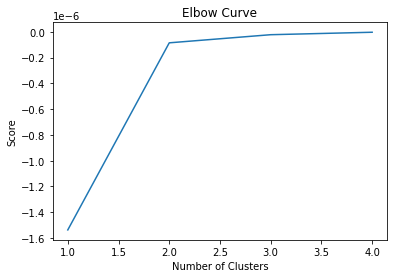

In [33]:
import matplotlib.pyplot as plt

# Apply unsupervised Machine Learning clustering technique to the neighborhood data in AIIMS Hospital
K_clusters = range(1,5)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = nearby_venues[['lat']]
X_axis = nearby_venues[['lng']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

The X-axis of the plot shows various number of K-values that we can use for our clustering analysis. As we can see from the chart, the curve starts flattening out at K=3. Therefore, we will use a K=3 to cluster neighborhoods surrounding our proposed Covid-19 testing center. The following lines of code assign Cluster label to all venues that are within a 500-meter radius of our Covid-19 testing center in AIIMS Hospital area:

In [34]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(nearby_venues[nearby_venues.columns[2:4]]) # Compute k-means clustering.
nearby_venues['cluster_label'] = kmeans.fit_predict(nearby_venues[nearby_venues.columns[2:4]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(nearby_venues[nearby_venues.columns[2:4]]) # Labels of each point
nearby_venues

,name,categories,lat,lng,cluster_label
0,AIIMS Metro Station,Light Rail Station,28.568243,77.207946,2
1,Tanishq South Ex,Jewelry Store,28.569292,77.208228,2
2,Hazoorilal Legacy,Jewelry Store,28.568438,77.210653,1
3,Jet Airways Lounge,Airport Food Court,28.569645,77.206465,0
4,Strength Gym,Gym,28.569383,77.204601,0


In [35]:
# Check whether all the cluster labels exist in the data
list(nearby_venues['cluster_label'].unique())

[2, 1, 0]

To better visualize the clustering of our neighborhood, we will need to create a custom function that we call ‘regioncolors’ that will assign a color to each area within a 500-meter radius of our proposed facility. The following line of code should help us with this task.

In [36]:
def regioncolors(counter):
    if counter['cluster_label'] == 0:
        return 'green'
    elif counter['cluster_label'] == 1:
        return 'orange'
    elif counter['cluster_label'] == 2:
        return 'red'
    else:
        return 'error'
nearby_venues["color"] = nearby_venues.apply(regioncolors, axis=1)
nearby_venues

,name,categories,lat,lng,cluster_label,color
0,AIIMS Metro Station,Light Rail Station,28.568243,77.207946,2,red
1,Tanishq South Ex,Jewelry Store,28.569292,77.208228,2,red
2,Hazoorilal Legacy,Jewelry Store,28.568438,77.210653,1,orange
3,Jet Airways Lounge,Airport Food Court,28.569645,77.206465,0,green
4,Strength Gym,Gym,28.569383,77.204601,0,green


At this stage, we have assigned cluster labels to all of our neighborhood venues, and we have assigned unique colors to each cluster. Next, we can then visualize our clustering analysis to a Folium map to see how all of these venues are geographically distributed within the 500-meter radius that we specified surrounding the proposed facility.

In [37]:
# Construct a map of neighborhood venues in AIIMS Hospital, Delhi
map_aiims = folium.Map(location=[28.5668602 , 77.2078058], zoom_start=15)
for lat, lng, cat, col in zip(nearby_venues['lat'], nearby_venues['lng'], nearby_venues['categories'], nearby_venues['color']):
    label = folium.Popup(cat, parse_html=True)
    folium.Marker(
        location=[lat, lng],
        popup=cat,
        icon=folium.Icon(color=col),
        ).add_to(map_aiims)      
lat = 28.5668602 
lng =  77.2078058 
neigh = 'AIIMS Hospital'
label = folium.Popup(neigh, parse_html=True)
folium.Marker(
    location=[lat, lng],
    popup=neigh,
    icon=folium.Icon(color='darkblue', icon='header'),
    ).add_to(map_aiims)    
    
map_aiims

Then we compiled a map of the results of this business location with a map of the distribution of COVID-19 cases.

In [38]:
# Construct a map of neighborhood venues in AIIMS Hospital, Delhi
map_Redzone = folium.Map(location=[28.5668602 , 77.2078058], zoom_start=15)
for lat, lng, cat, col in zip(nearby_venues['lat'], nearby_venues['lng'], nearby_venues['categories'], nearby_venues['color']):
    label = folium.Popup(cat, parse_html=True)
    folium.Marker(
        location=[lat, lng],
        popup=cat,
        icon=folium.Icon(color=col),
        ).add_to(map_Redzone)      
lat = 28.5668602 
lng =  77.2078058 
neigh = 'AIIMS Hospital'
label = folium.Popup(neigh, parse_html=True)
folium.Marker(
    location=[lat, lng],
    popup=neigh,
    icon=folium.Icon(color='darkblue', icon='header'),
    ).add_to(map_Redzone)
for lat,lon,area,size in zip(df_ll_a['Latitude'],df_ll_a['Longitude'],
                             df_ll_a['State or Union Territory'],df_ll_a['Active']):
     folium.CircleMarker(
         location=[lat, lon],
         popup=area,
         radius=size/2,
         color='r',
         opacity=0.5,
         fill=True,
         fill_opacity=0.5,
         fill_color='red',
         ).add_to(map_Redzone)
    
map_Redzone

The result of analysis is the location of the business which is in the AIIMS hospital neighborhood and is within a radius of 500 meters. Then, we also get the most congested cluster if businesses apply normal conditions in the red zone, potentially increasing cases of contracting the COVID-19 virus within the area.